# Phase I Analysis

The goal of phase I analysis is to discriminite between classifier types at a high level. This allows us to determine which classifiers have good predictive power for the classification problems of interest, then more finely tune those classifiers on an increased parameter set.

In [2]:
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

%matplotlib inline

## Load and Process Data

In [3]:
pd.options.display.max_colwidth = 500
rfdf = pd.read_csv('../results/phase_I_csv/test_run_RF_DT_BAG_BASEDT.csv')
gb = pd.read_csv('../results/phase_I_csv/test_run_gb_bl.csv')
nb = pd.read_csv('../results/phase_I_csv/test_run_NB.csv')
knn = pd.read_csv('../results/phase_I_csv/test_run_knn_01.csv')
lr = pd.read_csv('../results/phase_I_csv/LR.csv')
svc = pd.read_csv('../results/phase_I_csv/test_run_svc.csv')

results = rfdf.append(gb)
results = results.append(nb)
results = results.append(knn)
results = results.append(lr)
results = results.append(svc)

prefix = '(datetime.datetime('
pref_len = len(prefix)
results['year'] = results['testing_dates'].str.slice(start=pref_len, stop=pref_len+4)


## Model Comparisons

In [4]:
# Set common graphic features
plt.rcParams['figure.figsize'] = [8, 8]
plt.rcParams.update({'font.size': 14})

In [5]:
# Slice to 2016 results only
results_2016 = results[results['year'] == '2016']

Text(0,0.5,'AUC ROC')

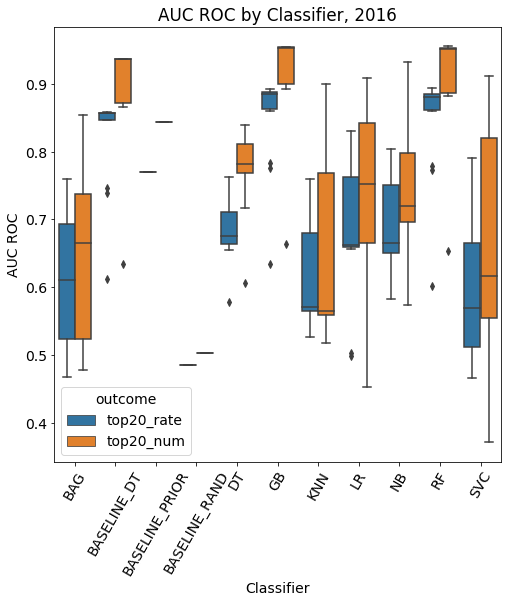

In [6]:
sns.boxplot(x='model_key', y='auc-roc', hue='outcome', data =results_2016.sort_values(by='model_key'))
plt.title("AUC ROC by Classifier, 2016")
plt.xticks(rotation=60)
plt.xlabel('Classifier')
plt.ylabel('AUC ROC')

Text(0,0.5,'Recall at 20%')

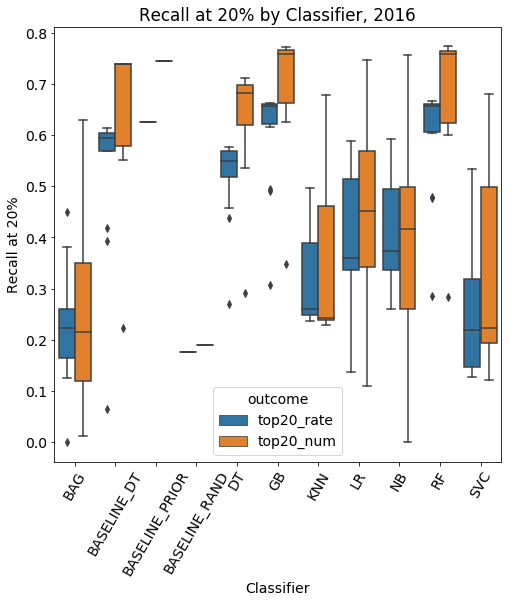

In [7]:
sns.boxplot(x='model_key', y='r_at_20', hue='outcome', data =results_2016.sort_values(by='model_key'))
plt.title("Recall at 20% by Classifier, 2016")
plt.xticks(rotation=60)
plt.xlabel('Classifier')
plt.ylabel('Recall at 20%')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36]), <a list of 37 Text xticklabel objects>)

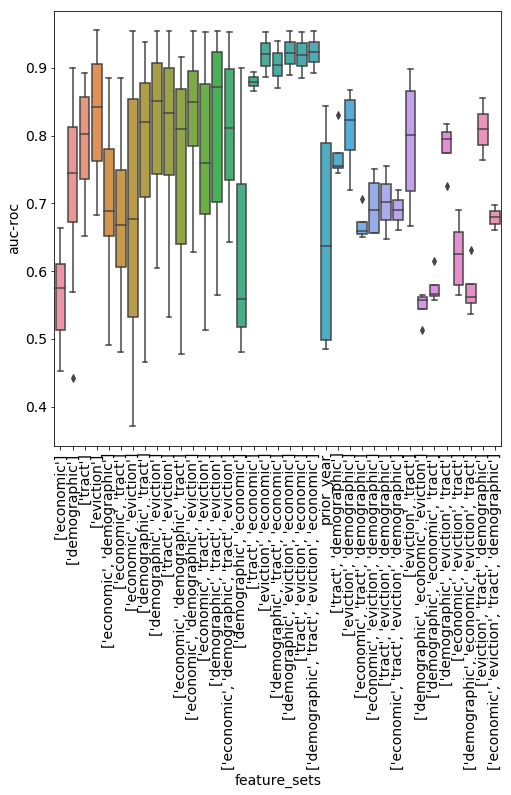

In [8]:
sns.boxplot(x='feature_sets',y='auc-roc',data=results_2016)
plt.xticks(rotation=90)